In [2]:
# %pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [31]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

### Keypoints using MP Holistic

In [32]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [33]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return results, image

In [34]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [35]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_holistic.FACEMESH_CONTOURS,
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1),
    ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [36]:
mp_holistic.FACEMESH_CONTOURS??

Type:        frozenset
String form: frozenset({(270, 409), (176, 149), (37, 0), (84, 17), (318, 324), (293, 334), (386, 385), (7, 163), (33, 246), (17, 314), (374, 380), (251, 389), (390, 373), (267, 269), (295, 285), (389, 356), (173, 133), (33, 7), (377, 152), (158, 157), (405, 321), (54, 103), (263, 466), (324, 308), (67, 109), (409, 291), (157, 173), (454, 323), (388, 387), (78, 191), (148, 176), (311, 310), (39, 37), (249, 390), (144, 145), (402, 318), (80, 81), (310, 415), (153, 154), (384, 398), (397, 365), (234, 127), (103, 67), (282, 295), (338, 297), (378, 400), (127, 162), (321, 375), (375, 291), (317, 402), (81, 82), (154, 155), (91, 181), (334, 296), (297, 332), (269, 270), (150, 136), (109, 10), (356, 454), (58, 132), (312, 311), (152, 148), (415, 308), (161, 160), (296, 336), (65, 55), (61, 146), (78, 95), (380, 381), (398, 362), (361, 288), (246, 161), (162, 21), (0, 267), (82, 13), (132, 93), (314, 405), (10, 338), (178, 87), (387, 386), (381, 382), (70, 63), (61, 185)

In [37]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        # make detections
        results, image = mediapipe_detection(frame, holistic)

        # draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCv Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [38]:
results

mediapipe.python.solution_base.SolutionOutputs

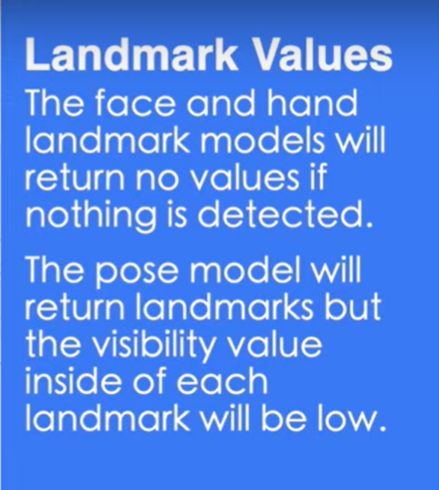

In [39]:
frame

array([[[149, 169, 163],
        [149, 169, 164],
        [151, 170, 165],
        ...,
        [255, 255, 255],
        [255, 255, 254],
        [255, 255, 253]],

       [[150, 170, 165],
        [150, 168, 164],
        [151, 168, 164],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       [[150, 168, 165],
        [150, 168, 165],
        [153, 170, 167],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 255]],

       ...,

       [[146, 144, 136],
        [143, 142, 135],
        [143, 144, 138],
        ...,
        [160, 167, 143],
        [164, 170, 145],
        [164, 171, 144]],

       [[140, 142, 130],
        [140, 141, 131],
        [139, 140, 133],
        ...,
        [159, 165, 141],
        [161, 166, 141],
        [159, 164, 139]],

       [[140, 142, 129],
        [144, 146, 134],
        [145, 147, 139],
        ...,
        [159, 165, 141],
        [154, 159, 134],
        [153, 157, 132]]

In [40]:
draw_styled_landmarks(frame, results)

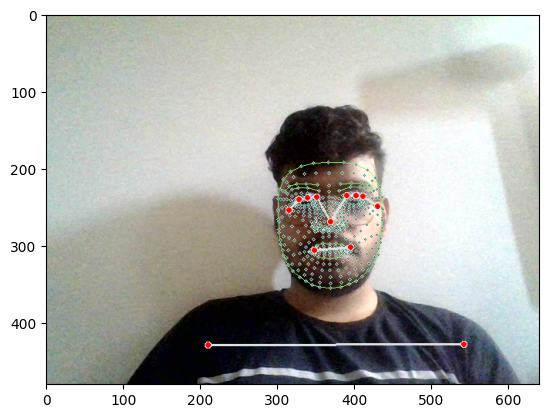

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Extract keypoint values

In [42]:
if results.right_hand_landmarks:
    for res in results.right_hand_landmarks.landmark:
        print(res)

In [43]:
# pose = [] # Store the landmarks in a list with respect to indexes
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])
pose = pose.flatten()

In [44]:
pose

array([ 5.77968538e-01,  5.61460495e-01, -1.09332979e+00,  9.99724567e-01,
        6.10122085e-01,  4.91231710e-01, -1.02382827e+00,  9.99291360e-01,
        6.28269672e-01,  4.91000593e-01, -1.02403724e+00,  9.99430716e-01,
        6.42343283e-01,  4.91937995e-01, -1.02448630e+00,  9.99221861e-01,
        5.49427629e-01,  4.95711058e-01, -1.02740741e+00,  9.99381781e-01,
        5.30452549e-01,  4.97441173e-01, -1.02644646e+00,  9.99570012e-01,
        5.12887001e-01,  5.01262784e-01, -1.02679515e+00,  9.99510407e-01,
        6.72834754e-01,  5.19237936e-01, -5.70585251e-01,  9.99146581e-01,
        4.93733793e-01,  5.29823422e-01, -5.57083964e-01,  9.99655128e-01,
        6.18232906e-01,  6.29321098e-01, -9.22801495e-01,  9.99673307e-01,
        5.44870436e-01,  6.38135493e-01, -9.20916855e-01,  9.99757946e-01,
        8.47917378e-01,  8.91954660e-01, -2.62869745e-01,  9.97441232e-01,
        3.28501284e-01,  8.95438612e-01, -3.49699944e-01,  9.99159217e-01,
        9.65955079e-01,  

In [45]:
# observe the shape the len of each array using results object
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 

    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose, face, lh, rh])

In [46]:
result_test = extract_keypoints(results)
result_test

array([ 0.57796854,  0.56146049, -1.09332979, ...,  0.        ,
        0.        ,  0.        ])

In [47]:
np.save('0', result_test)

### Setup folder for collections

#hello 
##0 ... 29 folders

In [48]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# actions trying to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30 # 30 sequences of each action 
sequence_length = 30 # 30 frames per sequence -> fps

In [49]:
for action in actions:
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collect keypoints values for training and testing

In [50]:
# rerun this code for correct data collection
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loop through actions
    for action in actions: 
        for sequence in range(no_sequences):
            # loop through video length aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
            
                # make detections
                results, image = mediapipe_detection(frame, holistic)

                # draw landmarks
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # new export keypoints logic
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                cv2.imshow('OpenCv Feed', image)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [26]:
cap.release()
cv2.destroyAllWindows()

### Preprocess Data and create Labels and Features

In [51]:
from sklearn.model_selection import train_test_split # partition data into training and testing sets
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [52]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [54]:
sequences, labels = [], []
for action in actions: 
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res) # append each frame to window 0->30 frames
        sequences.append(window) # append each window to sequences
        labels.append(label_map[action])

In [56]:
np.array(sequences).shape

(90, 30, 1662)

In [57]:
np.array(labels).shape

(90,)

In [62]:
X = np.array(sequences)
y = to_categorical(labels).astype(int) # convert to one-hot-encoding
# 100 -> hello , 010 -> thanks, 001 -> iloveyou encoding

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [67]:
X_test.shape

(5, 30, 1662)

### Build and train LSTM Nueral Network

In [68]:
from tensorflow.keras.models import Sequential # sequential neural network model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard # tensorboard for visualization (when model is being training)

In [69]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [75]:
model = Sequential() # make layers by layers model
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) # 64 neurons, return sequence for next layer, 1662 features
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # returns 3 multiclass classification

In [76]:
res = [.7, .2, .1] # model returns output
res

[0.7, 0.2, 0.1]

In [77]:
index = np.argmax(res) # get the index of the highest value
actions[index] # get the action 


'hello'

In [79]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.compile??
# using multiclass classification, so use categorical_crossentropy

In [81]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0968 - categorical_accuracy: 0.3529
E